# TP 1 : Prise en main d'OpenCV

## Avant propos
Les travaux pratiques du cours de Vision par ordinateur se feront à l'aide de la bibliothèque [OpenCV](http://opencv.org/) sous l'environnement de votre choix et ils consisteront en des applications des différents concepts vus en cours.
OpenCV a des interfaces C++, C, Python and Java et vous pouvez donc utilisez l'interface qui vous convient le mieux avec une préférence pour l'interface python. 

 


## Exercice 1 : Le Hello World d'OpenCV

Pour commencer vous devez installer la bibliothèque OpenCV (version 3) sur votre ordinateur. De nombreuses instructions sont disponibles pour l'installation sur le site officiel.
+ C++ :  [Installation](http://opencv.org/), rubrique Documentation - Tutorials ou Quick Start.
+ Python :[Tutorial python](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)

Vous pouvez aussi utiliser la commande :

    pip3 install opencv-python
et 

    pip3 install opencv-contrib-python


D'autres tutoriels peuvent être utilisés pour l'installation comme par exemple celui-ci sous Mac :

 + [opencv python sous mac](https://www.learnopencv.com/install-opencv3-on-macos/)

A l'issue de l'installation, vous devez réussir à compiler et à exécuter un programme consistant à ouvrir une image, à l'afficher et à fermer la fenêtre d'affichage. Une image est représentée comme une matrice dans OpenCV : structure **Mat**.  Une explication assez détaillée de la structure de données est disponible dans le tutorial [ici](http://docs.opencv.org/3.1.0/d6/d6d/tutorial_mat_the_basic_image_container.html). En python, il s'agit d'une array numpy. Si vous n'êtes pas familier avec numpy, vous pouvez suivre ce très bon [tutorial](http://cs231n.github.io/python-numpy-tutorial/) 

Les deux codes ci-dessous sont deux manières différentes de charger et d'afficher une image : soit en ouvrant une nouvelle fenêtre soit directement dans le notebook. Attention l'approche 1 n'est pas forcement très adaptée au notebook et donc dans ce cadre on privilégiera l'approche 2.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

def loadImage(src):
    img=cv2.imread(src,1)
    cv2.startWindowThread()
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


loadImage('./Images/oscar.jpg')


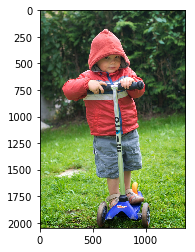

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import cv2

def loadImagebis(src):
    img=cv2.imread(src,1)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,interpolation='nearest')
    plt.show()

loadImagebis('./Images/oscar.jpg')

## Exercice 2 : quelques manipulations simples 

Création d'une image noire de taille $3 \times 3$

[[0 0 0]
 [0 0 0]
 [0 0 0]]


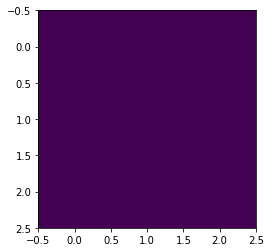

(3, 3)
9
uint8


In [2]:
img = np.zeros([3,3],dtype=np.uint8)
print(img)
plt.imshow(img)
plt.show()

print(img.shape)
print(img.size)
print(img.dtype)

Chargement et conversion d'une image en HSV

(2048, 1371, 3) 8423424 uint8


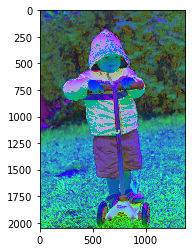

In [3]:
img=cv2.imread('./Images/oscar.jpg',1)
print(img.shape, img.size,img.dtype)

hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv,interpolation='nearest')
plt.show()

Récupération du canal bleu

In [13]:
bImg = cv2.split(img)[0]
print(bImg)

[[170 167 162 ...  30  30  30]
 [168 165 160 ...  30  30  30]
 [165 163 158 ...  30  30  30]
 ...
 [ 84  79  81 ...  16  11  19]
 [ 71  71  71 ...  30  28  35]
 [ 62  58  46 ...  36  39  44]]


Acceder au pixel (100,100)

In [5]:
px = img[100,100]
print(px)

[49 87 59]


Que fait le code ci-dessous ?

In [8]:
img.item(100,100,2)
# valeur de l'axe bleu du pixel 100x100

49

##  Exercice 3 : Premières manipulations avec OpenCV

Ecrire une fonction **loadImage(nom)** permettant d'ouvrir une image en niveau de gris ou en couleur, de la renvoyer, ainsi que sa taille.

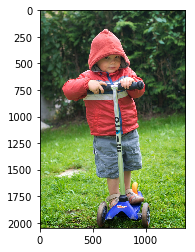

In [23]:
import os

def loadImage(path):
    if not os.path.exists(path):
        raise FileNotFoundError("img %s does not exist".format(path))
    img=cv2.imread(path,-1)
    if img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img, img.shape

img, shape = loadImage('./Images/oscar.jpg')
plt.imshow(img)
plt.show()

Ecrire une fonction **compterPixels(I, k)** qui renvoie le nombre de pixels de niveau de gris $k$ dans l'image $I$. Attention à bien travailler avec une image à niveau de gris. Faire de même pour une image couleur et une valeur $k$ équivalente à un triplet $(R,G,B)$.

In [28]:
def compterPixels(I,k):
    if len(I.shape) > 2:
        pix = 0
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                if I.item(i,j,0) == k[0] and I.item(i,j,1) == k[1] and I.item(i,j,2) == k[2]:
                    pix +=1
    else:
        pix = 0
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                if I[i,j] == k:
                    pix += 1
    return pix
        
print(compterPixels(img, (2,2,2)))
    
    

32


Ecrire une fonction **remplacerPixels(I, k1,k2)** qui  sauve, affiche et renvoie l'image correspondant à $I$ quand on a changé les valeurs $k1$ en $k2$.

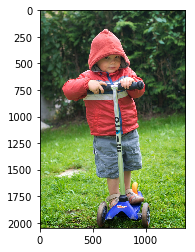

In [40]:
import numpy as np

def remplacerPixels(I,k1,k2):
    if len(I.shape) > 2:
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                if I.item(i,j,0) == k1[0] and I.item(i,j,1) == k1[1] and I.item(i,j,1) == k1[2]:
                    I[i,j][0] = k2[0]
                    I[i,j][1] = k2[1]
                    I[i,j][2] = k2[2]
    else:
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                if I[i,j] == k1:
                    I[i,j] = k2
    return I


new_img = remplacerPixels(img, (22, 33, 7), (255,255,255))
plt.imshow(new_img)
plt.show()

Ecrire une fonction **inversionImage(I)** qui renvoie l'image inversée ($k'=255-k$).


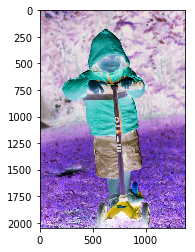

In [41]:
def inverserImage(I):
    if len(I.shape) > 2:
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                I[i,j][0] = 255 - I[i,j][0]
                I[i,j][1] = 255 - I[i,j][1]
                I[i,j][2] = 255 - I[i,j][2]
    else:
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                I[i,j] = 255 - I[i,j]
    return I

new_img = inverserImage(img)
plt.imshow(new_img)
plt.show()

Ecrire une fonction **calculhisto(I)** qui calcule, affiche et renvoie l'histogramme de l'image I. Pour cela vous pourrez faire appel à la fonction **cv2.calcHist** d'OpenCV ou à la fonction **np.histogram** de numpy. Un tutoriel est disponible [ici](http://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html). Vous prendrez bien le soin de tester les différents paramètres de la fonction **cv2.calcHist**. 

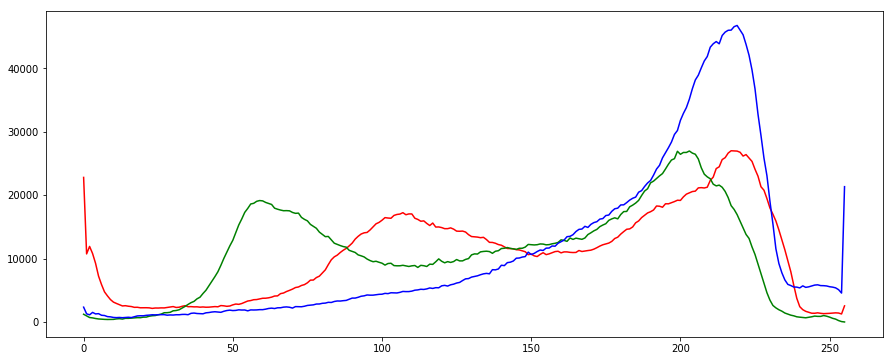

In [54]:
from cv2 import calcHist

def calculhisto(I):
    if len(I.shape) > 2:
        r = calcHist([I], [0], None, [256], [0,256])
        g = calcHist([I], [1], None, [256], [0,256])
        b = calcHist([I], [2], None, [256], [0,256])
    return (r,g,b)

x = np.linspace(0,255, 256)
rgbHist = calculhisto(img)
plt.figure(figsize=(15,6))
plt.plot(x, rgbHist[0], c="r")
plt.plot(x, rgbHist[1], c="g")
plt.plot(x, rgbHist[2], c="b")
plt.show()

Ecrire et tester une fonction **seuillage(I,s)** qui renvoie une image I seuillée (les pixels de valeur $> s$ sont mis à 255 et les autres à 0. On pourra faire appel à la fonction **cv2.threshold**. Un tutoriel est disponible [ici]( http://docs.opencv.org/3.2.0/d7/d4d/tutorial_py_thresholding.html).


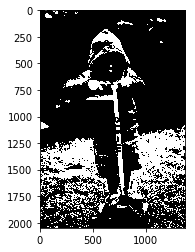

In [58]:
def seuillage(I,s):
    if len(I.shape) > 2:
        I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i,j] < s:
                I[i,j] = 0
            else:
                I[i,j] = 255
    return I

new_image = seuillage(img, 100)
plt.imshow(new_image, cmap="Greys")
plt.show()

## Exercice 4 : Un algorithme simple pour détecter la peau

L'objectif de cet exercice est la conception d'algorithmes simples pour détecter la peau dans des images. Cette approche est fondée sur plusieurs travaux de la littérature, disponibles sur Claroline comme par exemple :
+ A Survey on Pixel-Based Skin Color Detection Techniques}, Vezhnevets V., Sazonov V., Andreeva A, IN PROC. GRAPHICON-2003, 2003 (disponible sur Claroline et sur le dépôt git).
+ Statistical Color Models with Application to Skin Detection}, Michael J. Jones, James M. Rehg, In Int. J. Comput. Vision 46, 1 (January 2002), 81-96 (disponible sur Claroline et sur le dépôt git).
+ A survey of skin-color modeling and detection methods}, P. Kakumanu, S. Makrogiannis, N. Bourbakis. In Pattern Recogn. 40, 3 (March 2007), 1106-1122 (disponible sur Claroline et sur le dépôt git).


En particulier, l'article suivant :  *A Survey on Pixel-Based Skin Color Detection Techniques, Vezhnevets V., Sazonov V., Andreeva A, IN PROC. GRAPHICON-2003, 2003*, disponible sur Claroline, listant et décrivant les approches connues servira de base  pour le développement de votre application de detection de la peau. Le principe général va consister en l'utilisation d'une base d'exemples de *peau* et d'une base d'exemples de *non-peau* qui vont nous permettre d'apprendre la couleur de la peau  et d'en construire un modèle. Comme mentionné dans l'article, plusieurs questions se posent :
+  Le choix de l'espace de représentation de la couleur, notamment pour garantir une bonne séparation entre la peau et la non peau.
+  La manière de construire le modèle de peau ( non-paramétrique ou paramétrique).


### Base d'images
Pour ce TP, nous allons utiliser un jeu de données existants :  [le Pratheepan Dataset](http://web.fsktm.um.edu.my/~cschan/downloads_skin_dataset.html) disponible dans le répertoire Data et sur Claroline. L'ensemble des images sera utilisé pour construire le modèle de la peau et le modèle de non peau. Pour ce dernier, d'autres images pourront aussi être ajoutées pour rendre le modèle plus robuste.




### Une première méthode simple
La première méthode décrite dans l'article de Vezhnevets et al consiste à utiliser une règle de classification simple.

Un pixel de composante (RGB) est classifié comme pixel de peau  si :
 + $R > 95 $
 + $G > 40$
 + $B > 20$
 + $\max\{R,G,B\} - \min\{R,G,B\} > 15$ 
 + $|R-G| > 15 $ 
 + $R > G$ 
 + $R>B$


Mettre en oeuvre cette méthode et tester la sur quelques images de la base ainsi que sur  des images de peau  et des images de non-peau non présentes dans la base. Commenter vos résultats.

La mise en oeuvre de cette méthode vous permettra de prendre en main les principales fonctions de manipulations d'images (parcours d'image, accès à un pixel, seuillage). Par défaut, les images couleur sont en BGR et la première composante d'un pixel correspond donc au canal bleu et non rouge.


/Users/danieltaylor/.virtualenvs/vision/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


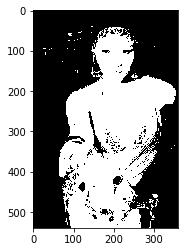

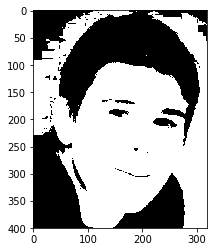

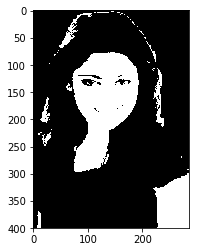

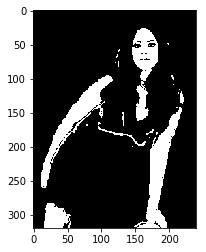

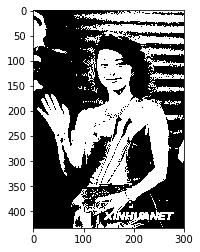

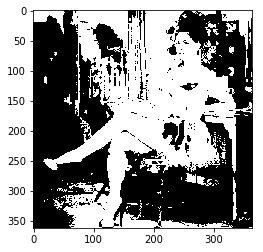

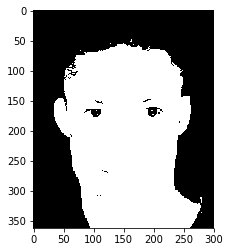

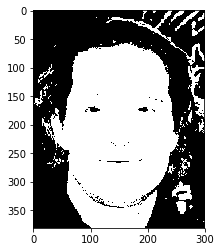

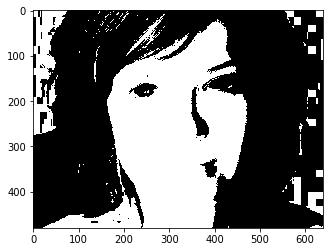

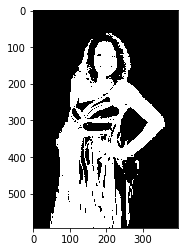

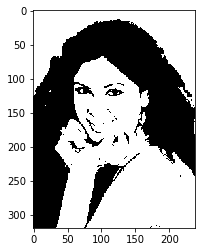

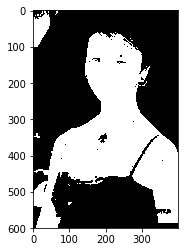

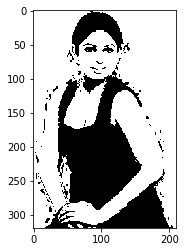

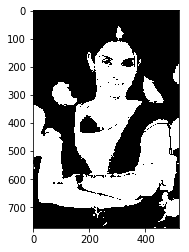

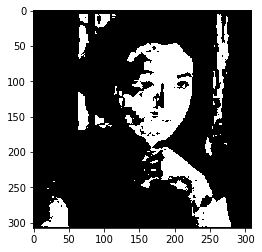

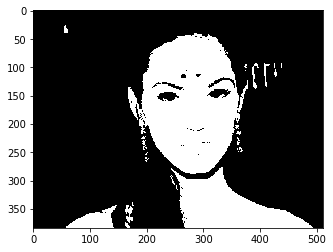

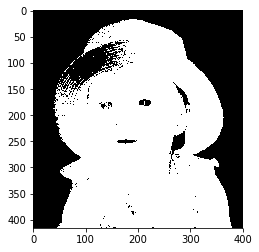

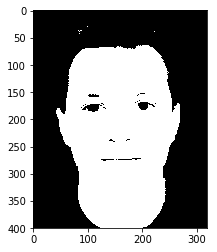

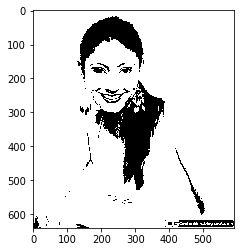

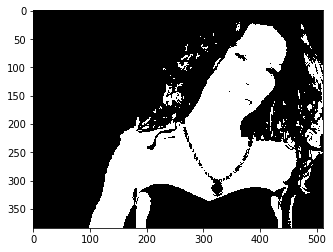

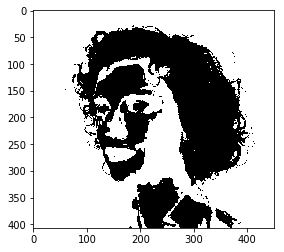

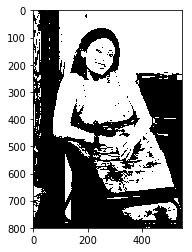

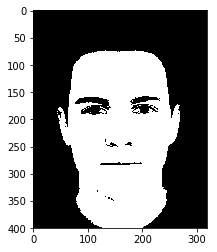

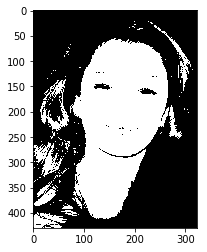

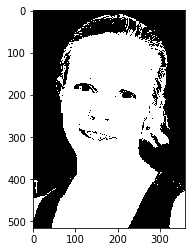

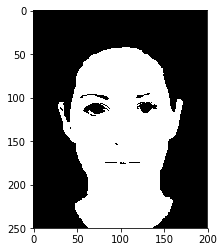

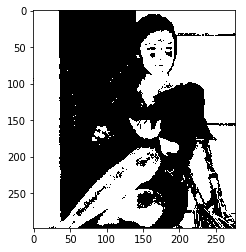

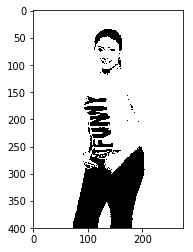

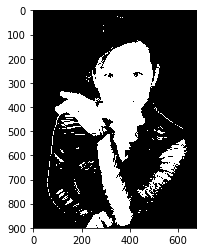

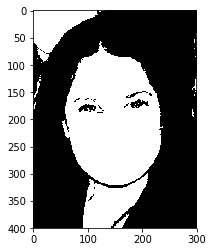

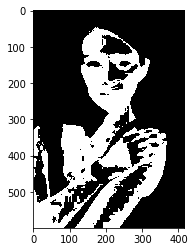

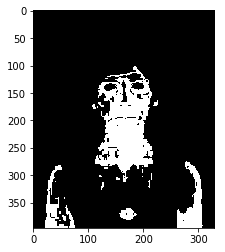

In [88]:
def isSkinPixel(pixel):
    skin = True
    r,g,b = pixel[0], pixel[1], pixel[2]
    if r <= 95 or g <= 40 or b <= 20:
        skin = False
    if np.max([r,g,b]) - np.min([r,g,b])<= 15:
        skin = False
    if np.abs(r-g) <= 15:
        skin = False
    if r < g or r < b:
        skin = False
    return skin

def skindetectionsimple(src):
    if not os.path.exists(src):
        raise FileNotFoundError("img %s not found".format(src))
    img = cv2.imread(src, -1)
    if len(img.shape) < 3:
        raise ValueError("You must use an rgb image")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if isSkinPixel(img[i,j]):
                img[i,j] = [255, 255, 255]
            else:
                img[i,j] = [0,0,0]
    return img

paths =  list((os.path.join("./Data/Face_Dataset/Pratheepan_Dataset/FacePhoto", f) for f in os.listdir("./Data/Face_Dataset/Pratheepan_Dataset/FacePhoto") if os.path.isfile(os.path.join("./Data/Face_Dataset/Pratheepan_Dataset/FacePhoto", f))))

def print_skin_masks(paths):
    masks = []
    for path in paths:
        skin_mask = skindetectionsimple(path)
        masks.append(skin_mask)
        plt.imshow(skin_mask)
        plt.show()
    return masks

masks = print_skin_masks(paths)

### Approche non paramétrique : Histogramme et modèle de peau

Plusieurs espaces couleurs sont possibles pour détecter les zones de peau dans des images. Dans ce TP, un objectif est de comparer entre différents types d'espaces couleur. Vous comparerez notamment les espaces RGB, HSV et Lab mais vous pouvez aussi en tester et en comparer d'autres.

#### Conversion d'espaces couleurs

Un premier travail est d'écrire un programme permettant de transformer une image d'un espace couleur à un autre. Pour cela, il faudra faire appel à la fonction **cvtColor** d'OpenCV.
 + [Tutorial](http://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html)
 + [Documentation](http://docs.opencv.org/3.2.0/d7/d1b/group__imgproc__misc.html#ga397ae87e1288a81d2363b61574eb8cab)



In [89]:
images = []
for path in paths:
    images.append(cv2.cvtColor(cv2.imread(path, -1), cv2.COLOR_BGR2RGB)


SyntaxError: unexpected EOF while parsing (<ipython-input-89-ebb99cddf140>, line 3)

#### Construction d'histogrammes 2D
Dans un premier temps, on pourra travailler avec l'espace Lab. Vous n'utiliserez que les composantes a et b (axes de couleur) et pas L (axe de luminance). 
Le travail consiste à construire deux **histogrammes 2D** de couleur, un histogramme *peau* et un histogramme *non-peau*. Il s'agit d'un tableau à 2 dimensions (a et b pour Lab, r et g pour rgb et h et s pour hsv). Pour chaque dimension on réduira l'échelle des valeurs de 256 à 32 (réduction de la quantification) et pour chaque case du tableau, il suffit de compter le nombre de pixels ayant comme valeur le couple (a,b) donné. Tous les pixels *peau* de toutes les images se retrouvent dans le même histogramme et réciproquement pour les pixels *non-peau*. Chaque histogramme sera aussi normalisé en divisant chaque valeur par le nombre total de pixels.

Vous pouvez pour cela faire appel à la fonction **calcHist** d'OpenCV. Contrairement à ce qui a été fait auparavant, il faudra:

+ construire un histogramme en 2D : [documentation](http://docs.opencv.org/3.2.0/dd/d0d/tutorial_py_2d_histogram.html)
+ utiliser un mask pour sélectionner les zones de peau et les zones de non peau (le masque étant l'image de la vérité terrain dans le cas de la peau et son complément pour la non-peau).
+ mettre le flag accumulate à true (l'histogramme devant être calculé sur un ensemble d'images correspondant à chaque classe).

Vous devez donc construire deux histogrammes pour chaque espace de couleur choisi. Ces histogrammes pourront dans la suite être considérés comme un modèle de peau et un modèle de non-peau.

(256, 256)


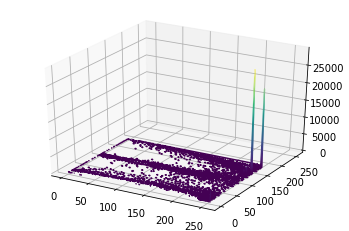

In [87]:
from mpl_toolkits import mplot3d

def Histogram2d(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1], None, [256, 256], [0, 256, 0, 256])
    print(hist.shape)
    return hist

def plotHist2d(hist):
    x = np.linspace(0, 255, 256)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    fig.figsize=(15,6)
    ax.contour3D(x[::-1], x, hist)
    plt.show()
    
nimg = cv2.imread(paths[0], 1)
plotHist2d(Histogram2d(nimg))
    

#### Detection de la peau dans les images à partir des histogrammes

Plusieurs approches sont possibles pour détecter la peau dans les images (c.f. articles fournis sur Claroline). Une approche simple consiste à calculer, pour un pixel p d'une image, sa probabilité de peau et de non-peau à partir de sa couleur c = (a,b)(rappel : seules deux composantes sont utilisées) :
+ $p(peau|c)=p(c|peau)=HistoPeau(a,b)$
+ $p(\neg peau|c)=p(c|\neg peau)=HistoNonPeau(a,b)$

La probabilité la plus élevée permet de décider si le pixel est un pixel de peau ou non.

Mettre en oeuvre et tester cette méthode.

In [ ]:
# TO COMPLETE

#### Detection de la peau dans les images : méthode de Bayes

Cette décision peut être raffinée en utilisant la méthode de Bayes : 
$$p(peau|c)=\frac{p(c|peau)p(peau)}{p(c|peau)p(peau) +p(c|\neg peau)p(\neg peau)}$$
 avec $p(c|peau)$ et $p(c|\neg peau)$ données par les histogrammes et $p(peau)$ et $p(\neg peau)$ sont les pourcentages de pixels peau et non-peau dans votre base d'apprentissage. Une règle de classification peut alors être de classifier les pixels comme pixels de peau si $p(peau|c) > \Theta$ ou $\Theta$ est un seuil à déterminer.

Mettre en oeuvre et tester cette méthode.

In [ ]:
# TO COMPLETE

### Evaluation
En utilisant la même base d'images que pour votre apprentissage, évaluez le pourcentage de pixels peau que vous
réussissez à bien détecter (évaluation quantitative en terme de taux de bonne detection (TP) et de mauvaise detection (FP)). Est-ce que cela vous semble correct ?

Evaluez maintenant vos différentes approches sur une autre base pour laquelle vous avez la vérité terrain mais qui n'a pas été utilisée pour construire vos modèles de peau. Analysez vos résultats. En particulier, vous devrez montrer dans le rapport des images où la détection fonctionne bien et d'autres où cela fonctionne moins bien, en expliquant pourquoi selon vous.




### Discussion
Comment peut-on améliorer les résultats que vous avez obtenus ? Donnez des idées. Que faudrait-il faire pour détecter les visages ?
N'hésitez pas à suggérer et à tester de nouvelles idées. Plusieurs variantes améliorant les résultats
sont possibles.